# Final Project Submission
* Student name: James M. Irivng, Ph.D.
* Student pace: full time
* Scheduled project review date/time: 05/15/19 2:30 pm
* Instructor name: Jeff Herman / Brandon Lewis
* Blog post URL:


# Iowa Prisoner Recidivism

<img src="images/LSA_map_with_counties_districts_and_B54A5BBCE4156.jpg" width=80%>

## Data Source: Iowa Department of Corrections 

- Source: 
    - https://www.kaggle.com/slonnadube/recidivism-for-offenders-released-from-prison
- Original/Up-to-date Source: 
    - https://data.iowa.gov/Correctional-System/3-Year-Recidivism-for-Offenders-Released-from-Pris/mw8r-vqy4
- **Statistics about recidivism in prisoners from a 3 year prisoner**
- **Target:**
    - Recidivism - Return to Prison
- **Features:**
    - Fiscal Year Released
    - Recidivism Reporting Year
    - Race - Ethnicity
    - Age At Release
    - Convicting Offense Classification
    - Convicting Offense Type
    - Convicting Offense Subtype
    - Main Supervising District
    - Release Type
    - Release type: Paroled to Detainder united
    - Part of Target Population

### Detailed variable descriptions:

- **Fiscal Year Released**
    - Fiscal year (year ending June 30) for which the offender was released from prison.

- **Recidivism Reporting Year**
    - Fiscal year (year ending June 30) that marks the end of the 3-year tracking period. For example, offenders exited prison in FY 2012 are found in recidivism reporting year FY 2015.

- **Race - Ethnicity**
    - Offender's Race and Ethnicity

- **Convicting Offense Classification**
    - Maximum penalties: A Felony = Life; B Felony = 25 or 50 years; C Felony = 10 years; D Felony = 5 years; Aggravated Misdemeanor = 2 years; Serious Misdemeanor = 1 year; Simple Misdemeanor = 30 days

- **Convicting Offense Type**
    - General category for the most serious offense for which the offender was placed in prison.

- **Convicting Offense Subtype**
    - Further classification of the most serious offense for which the offender was placed in prison.

- **Release Type**
    - Reasoning for Offender's release from prison.

- **Main Supervising District**
    - The Judicial District supervising the offender for the longest time during the tracking period.

- **Recidivism - Return to Prison**
    - No = No Recidivism; Yes = Prison admission for any reason within the 3-year tracking period
    
- **Part of Target Population** 
    - The Department of Corrections has undertaken specific strategies to reduce recidivism rates for prisoners who are on parole and are part of the target population.
    ___

# USING THE OSEMN MODEL TO GUIDE WORKFLOW

1. **OBTAIN:**
    - [x] Import data, inspect, check for datatypes to convert and null values
<br><br>

2. **SCRUB: cast data types, identify outliers, check for multicollinearity, normalize data**<br>
    - Check and cast data types
    - [x] Check for missing values 
    - [x] Check for multicollinearity
    - [x] Normalize data (may want to do after some exploring)   
    <br><br>
            
3. **EXPLORE:Check distributions, outliers, etc**
    - [x] Check scales, ranges (df.describe())
    - [x] Check histograms to get an idea of distributions (df.hist()) and data transformations to perform
    - [x] Use scatterplots to check for linearity and possible categorical variables (df.plot(kind-'scatter')
    <br><br>

   
4. **FIT AN INITIAL MODEL:** 
    - [x] Assess the model.
        <br><br>
5. **REVISE THE FITTED MODEL**
    - [x] Adjust chosen model and hyper-parameters
    <br><br>
6. **HOLDOUT VALIDATION**
    - [ ] Perform cross-validation
___

# OBTAIN:

#### Using Custom PyPi Package - `fsds`


In [1]:
# !pip install -U fsds
from fsds.imports import *

fsds v0.3.2 loaded.  Read the docs: https://fs-ds.readthedocs.io/en/latest/ 


Handle,Package,Description
dp,IPython.display,Display modules with helpful display and clearing commands.
fs,fsds,Custom data science bootcamp student package
mpl,matplotlib,Matplotlib's base OOP module with formatting artists
plt,matplotlib.pyplot,Matplotlib's matlab-like plotting module
np,numpy,scientific computing with Python
pd,pandas,High performance data structures and tools
sns,seaborn,High-level data visualization library based on matplotlib


In [2]:
## Set Pandas Options
# pd.set_eng_float_format(accuracy=2)
pd.set_option('display.float_format', lambda x: f'{x:.2f}')
pd_options = {
    'display.max_rows'    : 200,
    'display.max_info_rows':200,
    'display.max_columns' : 0,
}
[pd.set_option(option, setting) for option, setting in pd_options.items()]


## Set Plot Style
# plt.style.use('seaborn-notebook')
sns.set_context(font_scale=2)

## Suppress Warnings
import warnings
# warnings.filterwarnings('ignore')

In [3]:
%load_ext autoreload
%autoreload 2
import bs_ds_local as bs

##  PROJECT CONTROL BOOLEAN ARGS

In [4]:
## PROJECT CONTROL BOOLS

# Control if run new gridsearch or use previous params
RUN_SEARCHES = False

# Control if data downloaded fresh from Iowa gov api
GET_NEW_DATA = True

## Loading the dataset and removing unrelated columns

In [5]:
if GET_NEW_DATA:
    print('Downloading data from API...')
    url = "https://data.iowa.gov/resource/mw8r-vqy4.csv"
    df = pd.read_csv(url)
    
else:
    print('Using previously saved data...')
    df = pd.read_csv('data/3-Year_Recidivism_for_Offenders_Released_from_Prison_in_Iowa.csv')
    
    ## Making snake case column names if using orignal Kaggle dataset
    snake_case_cols = [c.lower().strip().replace(' - ',' ').replace(' ','_') for c in df.columns]

    ## clean up additional changes made to col names
    list_of_updates = [('classification','class'),
                       ('days_to_return','days_return'),
                      ('sub_type','subtype')]
    ## Fix changes in naming scheme
    for current,new in list_of_updates:
        snake_case_cols =[c.replace(current,new) for c in snake_case_cols]
    
    ## Make a renaming map and rename columns
    column_names_map = dict(zip(df.columns,snake_case_cols))
    df.rename(column_names_map,axis=1,inplace=True)
    
df.head()

,fiscal_year_released,recidivism_reporting_year,main_supervising_district,release_type,race_ethnicity,age_at_release,sex,offense_class,offense_type,offense_subtype,return_to_prison,days_return,recidivism_type,new_offense_class,new_offense_type,new_offense_subtype,target_population
0,2010,2013,7JD,Parole,Black - Non-Hispanic,25-34,Male,C Felony,Violent,Robbery,Yes,433.00,New,C Felony,Drug,Trafficking,Yes
1,2010,2013,NaN,Discharged – End of Sentence,White - Non-Hispanic,25-34,Male,D Felony,Property,Theft,Yes,453.00,Tech,NaN,NaN,NaN,No
2,2010,2013,5JD,Parole,White - Non-Hispanic,35-44,Male,B Felony,Drug,Trafficking,Yes,832.00,Tech,NaN,NaN,NaN,Yes
3,2010,2013,6JD,Parole,White - Non-Hispanic,25-34,Male,B Felony,Other,Other Criminal,No,NaN,No Recidivism,NaN,NaN,NaN,Yes
4,2010,2013,NaN,Discharged – End of Sentence,Black - Non-Hispanic,35-44,Male,D Felony,Violent,Assault,Yes,116.00,Tech,NaN,NaN,NaN,No


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   fiscal_year_released       int64  
 1   recidivism_reporting_year  int64  
 2   main_supervising_district  object 
 3   release_type               object 
 4   race_ethnicity             object 
 5   age_at_release             object 
 6   sex                        object 
 7   offense_class              object 
 8   offense_type               object 
 9   offense_subtype            object 
 10  return_to_prison           object 
 11  days_return                float64
 12  recidivism_type            object 
 13  new_offense_class          object 
 14  new_offense_type           object 
 15  new_offense_subtype        object 
 16  target_population          object 
dtypes: float64(1), int64(2), object(14)
memory usage: 132.9+ KB


In [7]:
## Check years included 
df[[c for c in df.columns if 'year' in c]].agg(['min','max'])

,fiscal_year_released,recidivism_reporting_year
min,2010,2013
max,2014,2017


**Any columns that are about New Convictions or days to recidivism should be dropped for our initial model predicting recidivism.**
- "New..", "Days to Recividism"

In [8]:
## Drop cols related to recivism details 
drop_expr = ['new',"days","recidivism_type","year"]
drop_cols = []
for exp in drop_expr:
    drop_cols.extend([col for col in df.columns if exp in col])
drop_cols

['new_offense_class',
 'new_offense_type',
 'new_offense_subtype',
 'days_return',
 'recidivism_type',
 'fiscal_year_released',
 'recidivism_reporting_year']

In [9]:
## Saving removed columns to merge again after feature engineering (for tableau)
removed_df = df[drop_cols].copy()
removed_df

,new_offense_class,new_offense_type,new_offense_subtype,days_return,recidivism_type,fiscal_year_released,recidivism_reporting_year
0,C Felony,Drug,Trafficking,433.00,New,2010,2013
1,NaN,NaN,NaN,453.00,Tech,2010,2013
2,NaN,NaN,NaN,832.00,Tech,2010,2013
3,NaN,NaN,NaN,NaN,No Recidivism,2010,2013
4,NaN,NaN,NaN,116.00,Tech,2010,2013
...,...,...,...,...,...,...,...
995,NaN,NaN,NaN,NaN,No Recidivism,2010,2013
996,NaN,NaN,NaN,NaN,No Recidivism,2010,2013
997,NaN,NaN,NaN,NaN,No Recidivism,2010,2013
998,NaN,NaN,NaN,NaN,No Recidivism,2010,2013


In [10]:
df.drop(columns=drop_cols,inplace=True)
df.head()

,main_supervising_district,release_type,race_ethnicity,age_at_release,sex,offense_class,offense_type,offense_subtype,return_to_prison,target_population
0,7JD,Parole,Black - Non-Hispanic,25-34,Male,C Felony,Violent,Robbery,Yes,Yes
1,NaN,Discharged – End of Sentence,White - Non-Hispanic,25-34,Male,D Felony,Property,Theft,Yes,No
2,5JD,Parole,White - Non-Hispanic,35-44,Male,B Felony,Drug,Trafficking,Yes,Yes
3,6JD,Parole,White - Non-Hispanic,25-34,Male,B Felony,Other,Other Criminal,No,Yes
4,NaN,Discharged – End of Sentence,Black - Non-Hispanic,35-44,Male,D Felony,Violent,Assault,Yes,No


### Save original names vs short names in column_legend
- then map names onto columns

In [11]:
# ## Replacing columns with short names
# rename_map = {
#     'Fiscal Year Released': 'yr_released',
#     'Recidivism Reporting Year': 'report_year' ,
#     'Main Supervising District': 'supervising_dist' ,
#     'Release Type': 'release_type' ,
#     'Race - Ethnicity': 'race_ethnicity'  ,
#     'Age At Release ':  'age_at_release' ,
#     'Sex':'sex'   ,
#     'Offense Classification': 'offense_class' ,
#     'Offense Type': 'crime_type'  ,
#     'Offense Subtype':  'crime_subtype' ,
#     'Return to Prison': 'recidivist'  ,
#     'Target Population':  'target_pop'
# }

# df = df.rename(rename_map,axis=1)
# df

In [12]:
df.to_csv('data/iowa_recidivism_renamed_2021.csv')

# SCRUB / EXPLORE


In [13]:
## Explore Dtypes and info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                     Dtype 
---  ------                     ----- 
 0   main_supervising_district  object
 1   release_type               object
 2   race_ethnicity             object
 3   age_at_release             object
 4   sex                        object
 5   offense_class              object
 6   offense_type               object
 7   offense_subtype            object
 8   return_to_prison           object
 9   target_population          object
dtypes: object(10)
memory usage: 78.2+ KB


,column,nunique,dtype,# Non-Null,# Nulls,% Nulls
0,main_supervising_district,8,object,553,447,44.70 %
1,release_type,3,object,998,2,0.20 %
2,race_ethnicity,8,object,1000,0,0.00 %
3,age_at_release,5,object,1000,0,0.00 %
4,sex,2,object,1000,0,0.00 %
5,offense_class,8,object,1000,0,0.00 %
6,offense_type,5,object,1000,0,0.00 %
7,offense_subtype,24,object,1000,0,0.00 %
8,return_to_prison,2,object,1000,0,0.00 %
9,target_population,2,object,1000,0,0.00 %


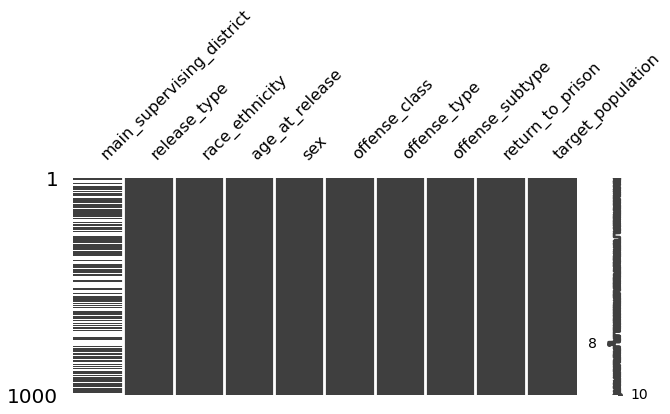

Columns with Null Values:


main_supervising_district    447
release_type                   2
dtype: int64

In [14]:
import missingno as ms
def column_report(df,perc_null_thresh=5,return_report=False):
    """Returns a dataframe with the following summary information
    for each column in df.
    - Dtype
    - # Unique Entries
    - # Null Values
    - # Non-Null Values
    - % Null Values
    """
    report = pd.DataFrame({
        'nunique':df.nunique(),
        'dtype':df.dtypes, 
        '# Non-Null': df.notnull().sum(),
        '# Nulls': df.isna().sum(),
        '% Nulls':df.isna().sum()/len(df)*100,
        })
    
    report = report.reset_index().rename({'index':'column'},axis=1)
    
    if return_report:
        return report#.round(2)    
    else:
        def style_nulls(v, thresh=perc_null_thresh, props=''):
            return props if v > thresh else None
        s2 = report.style.applymap(style_nulls, props='color:red;',subset=['% Nulls'])\
                        .format(lambda x: f"{x:.2f} %",subset=['% Nulls'])\
                        .set_caption("Column Report")
        display(s2)
    



def nulls_report(df,plot=True):
    nulls= df.isna().sum()
    nulls_only = nulls[nulls>0]
    nulls_only = nulls_only.round(2)
    
    
    if plot:
        with plt.style.context('seaborn-poster'):
            ms.matrix(df,figsize=(10,4))
            plt.show()
        
    print('Columns with Null Values:')
    display(nulls_only)#.style.format(lambda x: f"{x:.2f} %",
#                                                       subset=['%']))

  
    
column_report(df)
nulls_report(df)


In [15]:
col_report = column_report(df)
col_report

,column,nunique,dtype,# Non-Null,# Nulls,% Nulls
0,main_supervising_district,8,object,553,447,44.70 %
1,release_type,3,object,998,2,0.20 %
2,race_ethnicity,8,object,1000,0,0.00 %
3,age_at_release,5,object,1000,0,0.00 %
4,sex,2,object,1000,0,0.00 %
5,offense_class,8,object,1000,0,0.00 %
6,offense_type,5,object,1000,0,0.00 %
7,offense_subtype,24,object,1000,0,0.00 %
8,return_to_prison,2,object,1000,0,0.00 %
9,target_population,2,object,1000,0,0.00 %


In [16]:
# def color_nulls_red(v,thresh,props=''):
#     if v>thresh:  props='color:red;'
#     return props

# s2 = df.style.applymap(lambda x: color_nulls_red(x, 5))
# s2

**Results of Null Check**
- race_ethnicity has 30 (0.12% of data)
    -  drop
- age_at_release has 3 (0.01% of data)
    - drop
- sex has 3 (0.01% of data)
    - drop
- super_district has 9581(36.82% of data)
    - replace with "unknown"
- release_type has 1762 (6.77% of data)
    - drop
    
**Dropping all null values from age_at_release, race_ethnicity, and release_type.**

## SIMPLIFYING CATEGORICAL FEATURES

In [17]:
def value_counts(col,dropna=False,normalize=True,sort_index=False,rename=True):
    """Convenience function for display value counts with default params"""
    counts =  col.value_counts(dropna=dropna,normalize=normalize)
    if sort_index:
        counts.sort_index(inplace=True)
        
    if rename:
        counts.name=f'{counts.name}.value_counts(normalized={normalize}, dropna={dropna})'

    return counts

In [18]:
## inspect categories
dashes = '---'*20
for col in df.columns:
    print(dashes)
    print(f"Value Counts for {col}:")
    display(value_counts(df[col],normalize=False,rename=False))
    print()

------------------------------------------------------------
Value Counts for main_supervising_district:


NaN    447
5JD    146
1JD     90
2JD     73
8JD     68
7JD     59
3JD     41
6JD     38
4JD     38
Name: main_supervising_district, dtype: int64


------------------------------------------------------------
Value Counts for release_type:


Parole                          539
Discharged – End of Sentence    445
Special Sentence                 14
NaN                               2
Name: release_type, dtype: int64


------------------------------------------------------------
Value Counts for race_ethnicity:


White - Non-Hispanic                               665
Black - Non-Hispanic                               232
White - Hispanic                                    80
American Indian or Alaska Native - Non-Hispanic     15
Asian or Pacific Islander - Non-Hispanic             5
American Indian or Alaska Native - Hispanic          1
White -                                              1
Black - Hispanic                                     1
Name: race_ethnicity, dtype: int64


------------------------------------------------------------
Value Counts for age_at_release:


25-34           342
35-44           250
45-54           187
Under 25        180
55 and Older     41
Name: age_at_release, dtype: int64


------------------------------------------------------------
Value Counts for sex:


Male      901
Female     99
Name: sex, dtype: int64


------------------------------------------------------------
Value Counts for offense_class:


D Felony                                 426
C Felony                                 273
Aggravated Misdemeanor                   158
Felony - Enhanced                         67
B Felony                                  66
Serious Misdemeanor                        7
Other Felony (Old Code)                    2
Sexual Predator Community Supervision      1
Name: offense_class, dtype: int64


------------------------------------------------------------
Value Counts for offense_type:


Drug            326
Property        316
Violent         223
Public Order    123
Other            12
Name: offense_type, dtype: int64


------------------------------------------------------------
Value Counts for offense_subtype:


Trafficking                        267
Theft                              140
Assault                            113
Burglary                            92
Sex                                 60
Forgery/Fraud                       59
OWI                                 52
Drug Possession                     33
Other Drug                          26
Traffic                             24
Other Violent                       21
Sex Offender Registry/Residency     21
Murder/Manslaughter                 18
Arson                               12
Vandalism                           12
Robbery                             11
Alcohol                             11
Weapons                              9
Other Criminal                       9
Flight/Escape                        5
Special Sentence Revocation          2
Kidnap                               1
Stolen Property                      1
Prostitution/Pimping                 1
Name: offense_subtype, dtype: int64


------------------------------------------------------------
Value Counts for return_to_prison:


No     710
Yes    290
Name: return_to_prison, dtype: int64


------------------------------------------------------------
Value Counts for target_population:


Yes    553
No     447
Name: target_population, dtype: int64

### Notes on Categorical Features

- convert age_at_release to numeric
- Convert return_to_prison and 'target_population' to 0,1

### Making `age_at_release` numerical

In [19]:
value_counts(df['age_at_release'])#.value_counts(dropna=False)

25-34          0.34
35-44          0.25
45-54          0.19
Under 25       0.18
55 and Older   0.04
Name: age_at_release.value_counts(normalized=True, dropna=False), dtype: float64

In [20]:
# converting age to numeric feature
age_num_map = {'Under 25':20,
              '25-34':30, 
              '35-44':40,
              '45-54':50,
              '55 and Older':70}
df['age_at_release'] = df['age_at_release'].map(age_num_map)
value_counts(df['age_at_release'])

30   0.34
40   0.25
50   0.19
20   0.18
70   0.04
Name: age_at_release.value_counts(normalized=True, dropna=False), dtype: float64

### df['race_ethnicity']

In [21]:
value_counts(df['race_ethnicity'],normalize=False)

White - Non-Hispanic                               665
Black - Non-Hispanic                               232
White - Hispanic                                    80
American Indian or Alaska Native - Non-Hispanic     15
Asian or Pacific Islander - Non-Hispanic             5
American Indian or Alaska Native - Hispanic          1
White -                                              1
Black - Hispanic                                     1
Name: race_ethnicity.value_counts(normalized=False, dropna=False), dtype: int64

- **Remapping race_ethnicity**
    - Due to the low numbers for several of the race_ethnicity types, reducing and combining Hispanic and Non-Hispanic groups
    - Alternative approach of separating race and ethnicity into 2 separate features was rejected after modeling

In [22]:
df['race_ethnicity'].unique()

array(['Black - Non-Hispanic', 'White - Non-Hispanic',
       'American Indian or Alaska Native - Non-Hispanic',
       'White - Hispanic', 'American Indian or Alaska Native - Hispanic',
       'Asian or Pacific Islander - Non-Hispanic', 'White -',
       'Black - Hispanic'], dtype=object)

In [23]:
# Defining Dictionary Map for race_ethnicity categories
# race_ethnicity_map = {'White - Non-Hispanic':'White',
#                         'Black - Non-Hispanic': 'Black',
#                         'White - Hispanic' : 'Hispanic',
#                         'American Indian or Alaska Native - Non-Hispanic' : 'American Native',
#                         'Asian or Pacific Islander - Non-Hispanic' : 'Asian or Pacific Islander',
#                         'Black - Hispanic' : 'Black',
#                         'American Indian or Alaska Native - Hispanic':'American Native',
#                         'White -' : 'White',
#                         'Asian or Pacific Islander - Hispanic' : 'Asian or Pacific Islander',
#                         'N/A -' : np.nan,
#                         'Black -':'Black'}

race_ethnicity_renamer = {'White -':'White - Non-Hispanic'}

# Replacing original race_ethnicity column with remapped one.
df['race_ethnicity'] = df['race_ethnicity'].replace(race_ethnicity_renamer)
value_counts(df['race_ethnicity'])

White - Non-Hispanic                              0.67
Black - Non-Hispanic                              0.23
White - Hispanic                                  0.08
American Indian or Alaska Native - Non-Hispanic   0.01
Asian or Pacific Islander - Non-Hispanic          0.01
American Indian or Alaska Native - Hispanic       0.00
Black - Hispanic                                  0.00
Name: race_ethnicity.value_counts(normalized=True, dropna=False), dtype: float64

### df['offense_class']

- **Remapping offense_class**
    - Combine 'Other Felony' and 'Other Felony (Old Code)' -> nan
    - Other Misdemeanor -> np.nan
    - Felony - Mandatory Minimum -> np.nan
    - Special Sentence 2005 -> Sex Offender
    - 'Sexual Predator Community Supervision' -> 'Sex Offender'
    - Other Felony -> np.nan    

In [24]:
value_counts(df['offense_class'])

D Felony                                0.43
C Felony                                0.27
Aggravated Misdemeanor                  0.16
Felony - Enhanced                       0.07
B Felony                                0.07
Serious Misdemeanor                     0.01
Other Felony (Old Code)                 0.00
Sexual Predator Community Supervision   0.00
Name: offense_class.value_counts(normalized=True, dropna=False), dtype: float64

In [25]:
# Remapping
offense_class_map = {'Other Felony (Old Code)':'Other Felony' ,#or other felony
                  'Other Misdemeanor':'Other Misdemeanor',
                   'Felony - Mandatory Minimum':'Other Felony',#np.nan, # if minimum then lowest sentence ==  D Felony
                   'Special Sentence 2005': 'Sex Offender',
                   'Other Felony' : 'Other Felony' ,
                   'Sexual Predator Community Supervision' : 'Sex Offender',
                   'D Felony': 'D Felony',
                   'C Felony' :'C Felony',
                   'B Felony' : 'B Felony',
                   'A Felony' : 'A Felony',
                   'Aggravated Misdemeanor':'Aggravated Misdemeanor',
                   'Felony - Enhancement to Original Penalty':'Felony - Enhanced',
                   'Felony - Enhanced':'Felony - Enhanced' ,
                   'Serious Misdemeanor':'Serious Misdemeanor',
                   'Simple Misdemeanor':'Simple Misdemeanor'}

df['offense_class'] = df['offense_class'].map(offense_class_map)
value_counts(df['offense_class'])

D Felony                 0.43
C Felony                 0.27
Aggravated Misdemeanor   0.16
Felony - Enhanced        0.07
B Felony                 0.07
Serious Misdemeanor      0.01
Other Felony             0.00
Sex Offender             0.00
Name: offense_class.value_counts(normalized=True, dropna=False), dtype: float64

### Remapping Binary Cols

#### Remapping target

In [26]:
value_counts(df['return_to_prison'])

No    0.71
Yes   0.29
Name: return_to_prison.value_counts(normalized=True, dropna=False), dtype: float64

In [27]:
# Recidivist
df['return_to_prison'] = df['return_to_prison'].map( {'No':0,'Yes':1})
value_counts(df['return_to_prison'])

0   0.71
1   0.29
Name: return_to_prison.value_counts(normalized=True, dropna=False), dtype: float64

#### `target_pop`

In [28]:
value_counts(df['target_population'])

Yes   0.55
No    0.45
Name: target_population.value_counts(normalized=True, dropna=False), dtype: float64

In [29]:
df['target_population'] = df['target_population'].map( {'No':0,'Yes':1})
value_counts(df['target_population'])

1   0.55
0   0.45
Name: target_population.value_counts(normalized=True, dropna=False), dtype: float64

___
## FEATURE ENGINEERING
- **Engineering a simple 'felony' true false category**
- **Combining crime_type and crime_subtype into types_combined**

### Creating a simple 'felony' feature

In [30]:
# Engineering a simple 'felony' true false category
df['felony'] = df['offense_class'].str.contains('felony',case=False)
value_counts(df['felony'])

True    0.83
False   0.17
Name: felony.value_counts(normalized=True, dropna=False), dtype: float64

In [31]:
# df['crime_types_combined'] = df['crime_type']+'_'+df['crime_subtype']
# value_counts(df['crime_types_combined'])

In [32]:
# Combining crime_type and crime_subtype into types_combined
# df['offense_class_type_subtype']= df['offense_class']+'_'+df['crime_type']+'_'+df['crime_subtype']
# value_counts(df['offense_class_type_subtype'])
df.nunique()

main_supervising_district     8
release_type                  3
race_ethnicity                7
age_at_release                5
sex                           2
offense_class                 8
offense_type                  5
offense_subtype              24
return_to_prison              2
target_population             2
felony                        2
dtype: int64

### Creating a 'max_sentence' feature based on crime class max penalties
   

In [33]:
value_counts(df['offense_class']).sort_index()

Aggravated Misdemeanor   0.16
B Felony                 0.07
C Felony                 0.27
D Felony                 0.43
Felony - Enhanced        0.07
Other Felony             0.00
Serious Misdemeanor      0.01
Sex Offender             0.00
Name: offense_class.value_counts(normalized=True, dropna=False), dtype: float64

- Unsure what Other Felony might represent. Will assume its halfway between C and D penalty

In [34]:
# Mapping years onto crime class
offense_class_max_sentence_map = {'A Felony': 75,  # Life
                                'Aggravated Misdemeanor': 2, # 2 years
                                'B Felony': 50, # 25 or 50 years
                                'C Felony': 10, # 10 years
                                'D Felony': 5,  # 5 yeras
                                  'Other Felony': 7,
                                'Felony - Enhanced': 10, # Add on to class C and D felonies, hard to approximate. 
                                'Serious Misdemeanor': 1, # 1 year
                                'Sex Offender': 10, # 10 years
                                'Simple Misdemeanor': 0.83} # 30 days

# Mapping max_sentence_column
df['max_sentence'] =df['offense_class'].map(offense_class_max_sentence_map)
value_counts(df['max_sentence'])

5.00    0.43
10.00   0.34
2.00    0.16
50.00   0.07
1.00    0.01
7.00    0.00
Name: max_sentence.value_counts(normalized=True, dropna=False), dtype: float64

### Dropping all  values replaced with np.nan

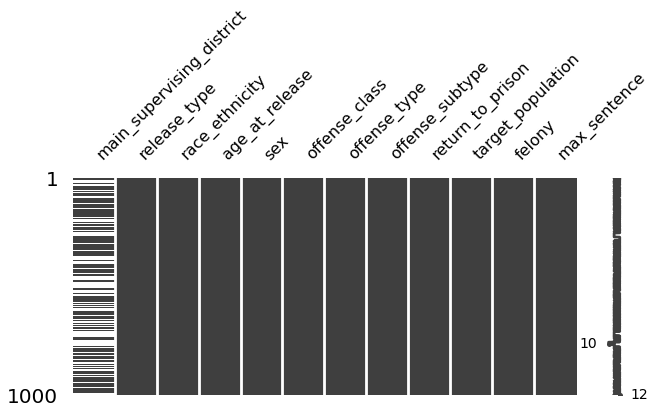

Columns with Null Values:


main_supervising_district    447
release_type                   2
dtype: int64

In [35]:
nulls_report(df)

## Checking Final Dtypes

> There are null values to deal with, will fill with placeholders

In [36]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                     Dtype  
---  ------                     -----  
 0   main_supervising_district  object 
 1   release_type               object 
 2   race_ethnicity             object 
 3   age_at_release             int64  
 4   sex                        object 
 5   offense_class              object 
 6   offense_type               object 
 7   offense_subtype            object 
 8   return_to_prison           int64  
 9   target_population          int64  
 10  felony                     bool   
 11  max_sentence               float64
dtypes: bool(1), float64(1), int64(3), object(7)
memory usage: 87.0+ KB


In [37]:
# df.info()
# dtypes = {'yr_released':str,
#          'report_year':str}

## Modeling Prep

## Preprocessing with  Pipelines and ColumnTransformer

In [38]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler,OneHotEncoder

from sklearn.model_selection import train_test_split

In [39]:
from sklearn import set_config
set_config(display='text')

In [40]:
## Make x and y
target = 'return_to_prison'
X = df.drop(columns=target).copy()
y = df[target].copy()
value_counts(y)

0   0.71
1   0.29
Name: return_to_prison.value_counts(normalized=True, dropna=False), dtype: float64

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y)

## BOOKMARK 

In [42]:
## Get a list of columns to be run as numeric data
num_cols = X_train.select_dtypes('number').columns
num_cols

Index(['age_at_release', 'target_population', 'max_sentence'], dtype='object')

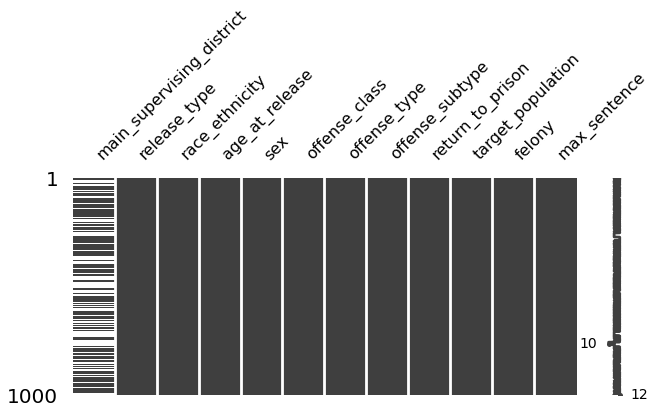

Columns with Null Values:


main_supervising_district    447
release_type                   2
dtype: int64

In [43]:
nulls_report(df)

In [44]:
## Make a num_transformer pipeline
set_config(display='diagram')
num_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler',StandardScaler())])
num_transformer

Pipeline(steps=[('imputer', SimpleImputer(strategy='median')),
                ('scaler', StandardScaler())])

In [45]:
# ## vis as diagram
# set_config(display='text')
# num_transformer

In [46]:
## Get a list of columns to be run as categorical data
cat_cols = X_train.select_dtypes('O').columns
cat_cols

Index(['main_supervising_district', 'release_type', 'race_ethnicity', 'sex',
       'offense_class', 'offense_type', 'offense_subtype'],
      dtype='object')

In [47]:
## Create a cat_transformer pipeline 
cat_transformer = Pipeline(steps=[
    ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
    ('encoder', OneHotEncoder(handle_unknown='ignore',sparse=False))])#handle_unknown='ignore',
cat_transformer

## that will impute using median and then calculate z-scores


Pipeline(steps=[('imputer',
                 SimpleImputer(fill_value='missing', strategy='constant')),
                ('encoder',
                 OneHotEncoder(handle_unknown='ignore', sparse=False))])

In [48]:
# TO DO: make another cat encoder with drop='if_binary'drop='if_binary',

### Combine Preprocessing into one ColumnTransformer

In [49]:
## COMBINE BOTH PIPELINES INTO ONE WITH COLUMN TRANSFORMER
from sklearn.compose import ColumnTransformer
preprocessing = ColumnTransformer(transformers=[
    ('num',num_transformer,num_cols),
    ('cat',cat_transformer,cat_cols)])
preprocessing

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 Index(['age_at_release', 'target_population', 'max_sentence'], dtype='object')),
                                ('cat',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse=False))]),
                                 Index(['main_supervising_district', 'release_type', 'race_ethnicity', 'sex',
       'offense_class', 'offense_type', 'offense_subtype'],
      dtype='object'))])

In [50]:
## Get X_train and X_test from column transformer
X_train_tf = preprocessing.fit_transform(X_train)
X_train_tf

array([[-0.53176276, -1.11301661, -0.63315344, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.13694882, -1.11301661,  0.08092939, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.13694882, -1.11301661, -0.36537238, ...,  0.        ,
         0.        ,  1.        ],
       ...,
       [ 1.13694882,  0.89845919, -0.36537238, ...,  0.        ,
         0.        ,  0.        ],
       [ 1.13694882,  0.89845919, -0.63315344, ...,  0.        ,
         0.        ,  0.        ],
       [-0.53176276,  0.89845919, -0.36537238, ...,  1.        ,
         0.        ,  0.        ]])

> **One downside of Pipelines is that its harder to get the individual info we need to re-form our dataset as a df**

In [51]:
cat_features = preprocessing.named_transformers_['cat'].named_steps['encoder'].get_feature_names(cat_cols)
X_train_tf = pd.DataFrame(X_train_tf,columns=[*num_cols, *cat_features])
X_train_tf.head()

,age_at_release,target_population,max_sentence,main_supervising_district_1JD,main_supervising_district_2JD,main_supervising_district_3JD,main_supervising_district_4JD,main_supervising_district_5JD,main_supervising_district_6JD,main_supervising_district_7JD,main_supervising_district_8JD,main_supervising_district_missing,release_type_Discharged – End of Sentence,release_type_Parole,release_type_Special Sentence,release_type_missing,race_ethnicity_American Indian or Alaska Native - Hispanic,race_ethnicity_American Indian or Alaska Native - Non-Hispanic,race_ethnicity_Asian or Pacific Islander - Non-Hispanic,race_ethnicity_Black - Non-Hispanic,race_ethnicity_White - Hispanic,race_ethnicity_White - Non-Hispanic,sex_Female,sex_Male,offense_class_Aggravated Misdemeanor,offense_class_B Felony,offense_class_C Felony,offense_class_D Felony,offense_class_Felony - Enhanced,offense_class_Other Felony,offense_class_Serious Misdemeanor,offense_class_Sex Offender,offense_type_Drug,offense_type_Other,offense_type_Property,offense_type_Public Order,offense_type_Violent,offense_subtype_Alcohol,offense_subtype_Arson,offense_subtype_Assault,offense_subtype_Burglary,offense_subtype_Drug Possession,offense_subtype_Flight/Escape,offense_subtype_Forgery/Fraud,offense_subtype_Kidnap,offense_subtype_Murder/Manslaughter,offense_subtype_OWI,offense_subtype_Other Criminal,offense_subtype_Other Drug,offense_subtype_Other Violent,offense_subtype_Prostitution/Pimping,offense_subtype_Robbery,offense_subtype_Sex,offense_subtype_Sex Offender Registry/Residency,offense_subtype_Special Sentence Revocation,offense_subtype_Stolen Property,offense_subtype_Theft,offense_subtype_Traffic,offense_subtype_Trafficking,offense_subtype_Vandalism,offense_subtype_Weapons
0,-0.53,-1.11,-0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,1.14,-1.11,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.14,-1.11,-0.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,-1.37,0.90,-0.37,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,0.30,0.90,0.08,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


In [52]:
X_test_tf = pd.DataFrame( preprocessing.transform(X_test),
                         columns=[*num_cols, *cat_features])
X_test_tf.head()

,age_at_release,target_population,max_sentence,main_supervising_district_1JD,main_supervising_district_2JD,main_supervising_district_3JD,main_supervising_district_4JD,main_supervising_district_5JD,main_supervising_district_6JD,main_supervising_district_7JD,main_supervising_district_8JD,main_supervising_district_missing,release_type_Discharged – End of Sentence,release_type_Parole,release_type_Special Sentence,release_type_missing,race_ethnicity_American Indian or Alaska Native - Hispanic,race_ethnicity_American Indian or Alaska Native - Non-Hispanic,race_ethnicity_Asian or Pacific Islander - Non-Hispanic,race_ethnicity_Black - Non-Hispanic,race_ethnicity_White - Hispanic,race_ethnicity_White - Non-Hispanic,sex_Female,sex_Male,offense_class_Aggravated Misdemeanor,offense_class_B Felony,offense_class_C Felony,offense_class_D Felony,offense_class_Felony - Enhanced,offense_class_Other Felony,offense_class_Serious Misdemeanor,offense_class_Sex Offender,offense_type_Drug,offense_type_Other,offense_type_Property,offense_type_Public Order,offense_type_Violent,offense_subtype_Alcohol,offense_subtype_Arson,offense_subtype_Assault,offense_subtype_Burglary,offense_subtype_Drug Possession,offense_subtype_Flight/Escape,offense_subtype_Forgery/Fraud,offense_subtype_Kidnap,offense_subtype_Murder/Manslaughter,offense_subtype_OWI,offense_subtype_Other Criminal,offense_subtype_Other Drug,offense_subtype_Other Violent,offense_subtype_Prostitution/Pimping,offense_subtype_Robbery,offense_subtype_Sex,offense_subtype_Sex Offender Registry/Residency,offense_subtype_Special Sentence Revocation,offense_subtype_Stolen Property,offense_subtype_Theft,offense_subtype_Traffic,offense_subtype_Trafficking,offense_subtype_Vandalism,offense_subtype_Weapons
0,0.30,-1.11,-0.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
1,-1.37,0.90,-0.63,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
2,-0.53,0.90,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
3,-1.37,-1.11,-0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00
4,1.14,0.90,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


# MODELING

In [53]:
import sklearn.metrics as metrics

def evaluate_classification(model,X_test,y_test,classes=['Non Recid','Recidivst'],
                           normalize='true',cmap='Purples',label='',
                           return_report=False):
    """Accepts an sklearn-compatible classification model + test data 
    and displays several sklearn.metrics functions: 
    - classifciation_report
    - plot_confusion_matrix
    - plot_roc_curve
    """
     
    ## Get Predictions
    y_hat_test = model.predict(X_test)
    
    ## Classification Report / Scores 
    table_header = "[i] CLASSIFICATION REPORT"
    
    ## Add Label if given
    if len(label)>0:
        table_header += f":\t{label}"
        
    
    ## PRINT CLASSIFICATION REPORT
    dashes = '---'*20
    print(dashes,table_header,dashes,sep='\n')

    print(metrics.classification_report(y_test,y_hat_test,
                                    target_names=classes))
    
    report = metrics.classification_report(y_test,y_hat_test,
                                               target_names=classes,
                                          output_dict=True)
    print(dashes+"\n\n")
    
    

    ## MAKE FIGURE
    fig, axes = plt.subplots(figsize=(10,4),ncols=2)
    
    ## Plot Confusion Matrix 
    metrics.plot_confusion_matrix(model, X_test,y_test,
                                  display_labels=classes,
                                  normalize=normalize,
                                 cmap=cmap,ax=axes[0])
    axes[0].set(title='Confusion Matrix')
    
    ## Plot Roc Curve
    roc_plot = metrics.plot_roc_curve(model, X_test, y_test,ax=axes[1])
    axes[1].legend()
    axes[1].plot([0,1],[0,1],ls=':')
    axes[1].grid()
    axes[1].set_title('Receiving Operator Characteristic (ROC) Curve') 
    fig.tight_layout()
    plt.show()
    
    if return_report:
        return report #fig,axes

## Baseline DummyClassifier

------------------------------------------------------------
[i] CLASSIFICATION REPORT:	Dummy Classifier
------------------------------------------------------------
              precision    recall  f1-score   support

   Non Recid       0.71      0.75      0.73       177
   Recidivst       0.31      0.27      0.29        73

    accuracy                           0.61       250
   macro avg       0.51      0.51      0.51       250
weighted avg       0.60      0.61      0.60       250

------------------------------------------------------------




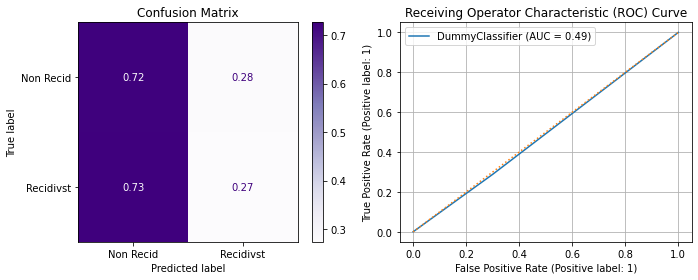

In [54]:
from sklearn.dummy import DummyClassifier
dummy= DummyClassifier(strategy='stratified')
dummy.fit(X_train_tf,y_train)
evaluate_classification(dummy,X_test_tf,y_test,
                       label='Dummy Classifier')

### Vanilla RandomForest

------------------------------------------------------------
[i] CLASSIFICATION REPORT:	Vanilla Random Forest
------------------------------------------------------------
              precision    recall  f1-score   support

   Non Recid       0.80      0.90      0.85       177
   Recidivst       0.65      0.44      0.52        73

    accuracy                           0.77       250
   macro avg       0.72      0.67      0.69       250
weighted avg       0.75      0.77      0.75       250

------------------------------------------------------------




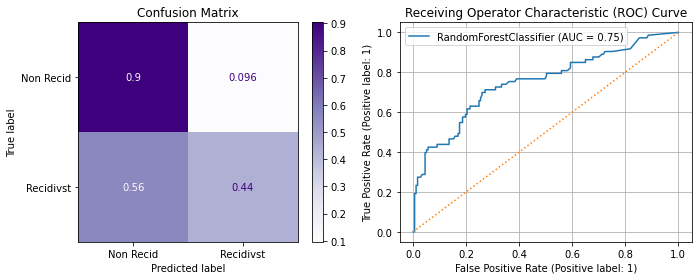

In [55]:
from sklearn.ensemble import RandomForestClassifier,StackingClassifier
from sklearn.linear_model import LogisticRegression,LogisticRegressionCV

## 
clf = RandomForestClassifier()
clf.fit(X_train_tf,y_train)
evaluate_classification(clf,X_test_tf,y_test,label="Vanilla Random Forest")

In [56]:
def get_feature_importance(clf,X_train_tf,plot=True):
    importances = pd.Series(clf.feature_importances_,index=X_train_tf.columns)
    return importances.sort_values(ascending=False)

def plot_importance(clf,X_train_tf,n=25):
    importances = get_feature_importance(clf,X_train_tf)
    ax = importances.sort_values().tail(n).plot(kind='barh')#,figsize=figsize)
    ax.set(title=f"Top {n} Most Important Features",xlabel='importance')

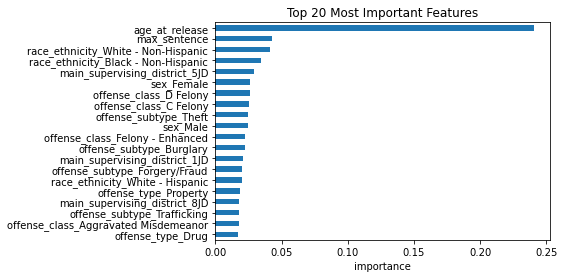

In [57]:
plot_importance(clf, X_test_tf,n=20)

### RandomForest - `class_weight="balanced"`

------------------------------------------------------------
[i] CLASSIFICATION REPORT:	Random Forest (class_weight='balanced')
------------------------------------------------------------
              precision    recall  f1-score   support

   Non Recid       0.79      0.84      0.81       177
   Recidivst       0.53      0.45      0.49        73

    accuracy                           0.72       250
   macro avg       0.66      0.64      0.65       250
weighted avg       0.71      0.72      0.72       250

------------------------------------------------------------




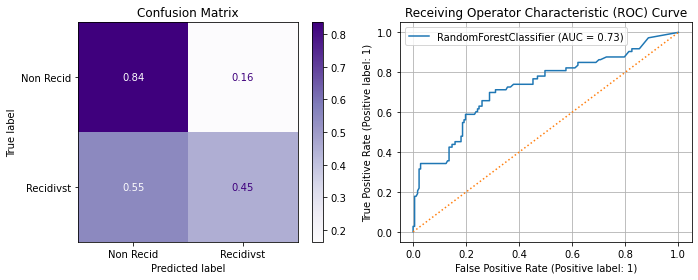

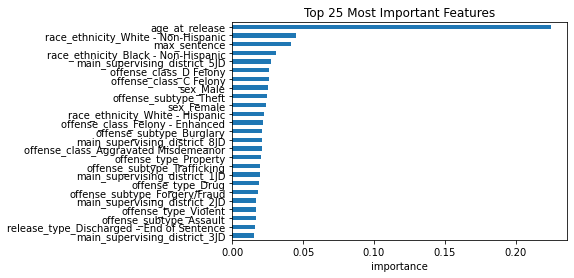

In [58]:
clf = RandomForestClassifier(class_weight='balanced')
clf.fit(X_train_tf,y_train)
evaluate_classification(clf,X_test_tf,y_test,label= "Random Forest (class_weight='balanced')")
plot_importance(clf,X_test_tf)

In [59]:
# get_feature_importance(clf,X_test_tf).to_frame('importance').style.bar()

### SMOTENC

In [60]:
## Getting cat features index
cat_col_index = [False for col in num_cols]
cat_col_index.extend([True for col in cat_features])
cat_col_index[:5]

[False, False, False, True, True]

In [61]:
from imblearn.over_sampling import SMOTENC
smote = SMOTENC(cat_col_index,n_jobs=-1)

In [62]:
X_train_smote,y_train_smote = smote.fit_resample(X_train_tf,y_train)
y_train_smote.value_counts()

0    533
1    533
Name: return_to_prison, dtype: int64

In [63]:
X_train_smote[:5]

,age_at_release,target_population,max_sentence,main_supervising_district_1JD,main_supervising_district_2JD,main_supervising_district_3JD,main_supervising_district_4JD,main_supervising_district_5JD,main_supervising_district_6JD,main_supervising_district_7JD,main_supervising_district_8JD,main_supervising_district_missing,release_type_Discharged – End of Sentence,release_type_Parole,release_type_Special Sentence,release_type_missing,race_ethnicity_American Indian or Alaska Native - Hispanic,race_ethnicity_American Indian or Alaska Native - Non-Hispanic,race_ethnicity_Asian or Pacific Islander - Non-Hispanic,race_ethnicity_Black - Non-Hispanic,race_ethnicity_White - Hispanic,race_ethnicity_White - Non-Hispanic,sex_Female,sex_Male,offense_class_Aggravated Misdemeanor,offense_class_B Felony,offense_class_C Felony,offense_class_D Felony,offense_class_Felony - Enhanced,offense_class_Other Felony,offense_class_Serious Misdemeanor,offense_class_Sex Offender,offense_type_Drug,offense_type_Other,offense_type_Property,offense_type_Public Order,offense_type_Violent,offense_subtype_Alcohol,offense_subtype_Arson,offense_subtype_Assault,offense_subtype_Burglary,offense_subtype_Drug Possession,offense_subtype_Flight/Escape,offense_subtype_Forgery/Fraud,offense_subtype_Kidnap,offense_subtype_Murder/Manslaughter,offense_subtype_OWI,offense_subtype_Other Criminal,offense_subtype_Other Drug,offense_subtype_Other Violent,offense_subtype_Prostitution/Pimping,offense_subtype_Robbery,offense_subtype_Sex,offense_subtype_Sex Offender Registry/Residency,offense_subtype_Special Sentence Revocation,offense_subtype_Stolen Property,offense_subtype_Theft,offense_subtype_Traffic,offense_subtype_Trafficking,offense_subtype_Vandalism,offense_subtype_Weapons
0,-0.53,-1.11,-0.63,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
1,1.14,-1.11,0.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
2,1.14,-1.11,-0.37,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00
3,-1.37,0.90,-0.37,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
4,0.30,0.90,0.08,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00


### RandomForest with SMOTE

------------------------------------------------------------
[i] CLASSIFICATION REPORT:	RandomForest - SMOTE
------------------------------------------------------------
              precision    recall  f1-score   support

   Non Recid       0.81      0.84      0.82       177
   Recidivst       0.57      0.51      0.54        73

    accuracy                           0.74       250
   macro avg       0.69      0.67      0.68       250
weighted avg       0.74      0.74      0.74       250

------------------------------------------------------------




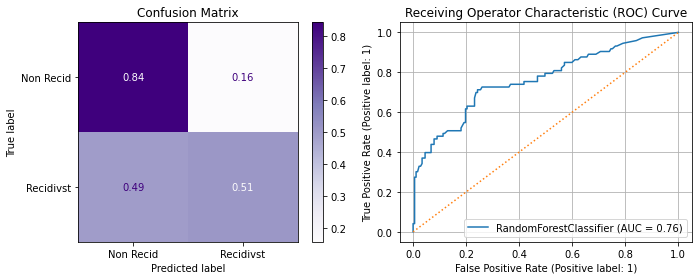

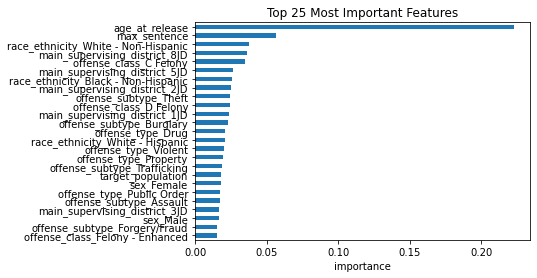

In [64]:
clf = RandomForestClassifier()#class_weight='balanced')
clf.fit(X_train_smote,y_train_smote)
evaluate_classification(clf,X_test_tf,y_test,label='RandomForest - SMOTE')
plot_importance(clf,X_test_tf)

# GridSearch RF

```python
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

clf = RandomForestClassifier()
params ={'max_depth':[None,5,7,10,20,30,],
         'min_samples_leaf':[1,2,3],
         'criterion':['gini','entropy'],        
        }


grid = GridSearchCV(clf,params,scoring='recall_macro', n_jobs=-1)

grid.fit(X_train_smote,y_train_smote)
print(grid.best_params_)

print(grid.best_score_)
evaluate_classification(grid.best_estimator_,X_test_tf,y_test)
```

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}
0.7971786281079174
------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

   Non Recid       0.77      0.64      0.70       177
   Recidivst       0.38      0.55      0.45        73

    accuracy                           0.61       250
   macro avg       0.58      0.59      0.58       250
weighted avg       0.66      0.61      0.63       250

------------------------------------------------------------




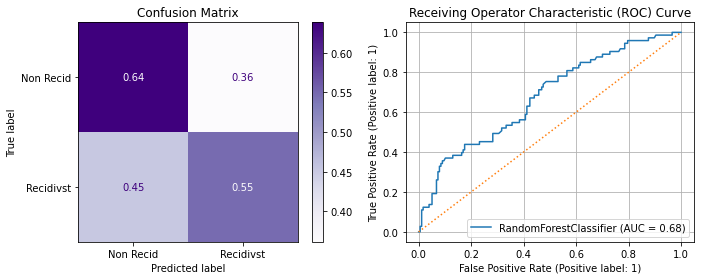

In [65]:
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

clf = RandomForestClassifier()
params ={'max_depth':[None,5,7,10,20,30,],
         'min_samples_leaf':[1,2,3],
         'criterion':['gini','entropy'],        
        }


grid = GridSearchCV(clf,params,scoring='recall', n_jobs=-1)

grid.fit(X_train_smote,y_train_smote)
print(grid.best_params_)

print(grid.best_score_)
evaluate_classification(grid.best_estimator_,X_test_tf,y_test)

## Bookmark: saving gridsearch
https://stackabuse.com/scikit-learn-save-and-restore-models/

In [66]:
## Make a folder for saving models
import os
mpath = './models/'
os.makedirs(mpath,exist_ok=True)

In [67]:
import joblib
## Save Grid
joblib_file = mpath+'rf_gridsearch_recall_macro.pkl'
joblib.dump(grid,joblib_file)

['./models/rf_gridsearch_recall_macro.pkl']

In [68]:
grid_loaded = joblib.load(joblib_file)
grid_loaded.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1}

### Testing Grid Results for Different Metrics

In [69]:
if RUN_SEARCHES:
    # scores =['recall','recall_macro','accuracy']

    GRIDS={}

    ## Build loop to make dict of grids for each score method
    scores =['f1','f1_macro','roc_auc','recall','recall_macro','accuracy','precision']

    reports = {}
    for score in scores:
        line = '==='*30
        print(line)
        print(f'[i] Starting {score}',end='\n'+line)

        GRIDS[score] = GridSearchCV(clf,params,cv=3,scoring=score, n_jobs=-1)
        GRIDS[score].fit(X_train_smote,y_train_smote)

        print(f"\nFor scoring={score}:" )
        print(GRIDS[score].best_params_)
        print('\n\n')

        reports[score] = evaluate_classification(GRIDS[score].best_estimator_,
                                        X_test_tf,y_test,label=score,return_report=True)
        ## Adding best_params to reports
    #     reports[score]['best_params'] = GRIDS[score].best_params_

In [70]:
if RUN_SEARCHES:
    dfs=[]
    for metric,result in reports.items():

        result['scoring_param'] = metric
        dfs.append(pd.DataFrame(result))

    RESULTS = pd.concat(dfs).reset_index().set_index(['scoring_param','index'])
    # RESULTS.drop('scoring param',inplace=True)
    RESULTS

# BOOKMARK 10/03 7;40PM

# LogisticRegression

In [71]:
# X_train_smote.describe()

In [72]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train_logreg = scaler.fit_transform(X_train_smote)
# X_test_logreg = scaler.transform(X_test_tf)

In [73]:
# logregCV = LogisticRegressionCV(scoring='recall',penalty='l1',cv=3,
#                                 solver='liblinear',max_iter=250,n_jobs=-1)

# logregCV.fit(X_train_smote,y_train_smote)
# logregCV

In [74]:
# evaluate_classification(logregCV,X_test_tf,y_test)

In [75]:
# def get_coeffs(logregCV, X_train_smote,):
#     coeffs = pd.Series(logregCV.coef_[0],index=X_train_smote.columns)
#     coeffs['Intercept'] = logregCV.intercept_
#     coeffs = coeffs.astype(float)
#     return coeffs

# coeffs = get_coeffs(logregCV,X_train_smote)
# coeffs.sort_values().plot(kind='barh',figsize=(5,10))

In [76]:
# logregCV.C_, logregCV.

## TO DO: Try tune-sklearn
- [Blog Post](https://towardsdatascience.com/5x-faster-scikit-learn-parameter-tuning-in-5-lines-of-code-be6bdd21833c)
- [Documentation](https://github.com/ray-project/tune-sklearn)

## StackingClassifier

In [77]:
# from sklearn.ensemble import StackingClassifier

# stack = StackingClassifier(estimators=[
#     ('rf',)
# ])

# CONCLUSIONS
- **After adjusting for imbalanced classes, the most important factor for determining recidivism are:**
    - **Age at Release**
    - **Supervising Judicial District**
    - **Release Type**
    - **Crime Subtype**
    
    
## Recommendatons
- This model could be used to predict which prisoners due for release may at the greatest risk for recidivism.<br><br>
    - Using this knowledge, the state of Iowa could put new programs into action that target those at high risk for recidivism and provide additional assistance and guidance following release.<br><br>
    - Additionally, there could be additional counseling or education _prior_ to release to supply the inmate with tools and options to avoid returning to a life of crime.
    
# FUTURE DIRECTIONS
- With more time and reliable performance, would perform cross-validation of our final model.<br><br>
- Additional visuals summarizing the underlying features effects on recidivism.<br><br>
- Adapting more available visualization tools to better display the underpinning of the model.
<br><br>
- Exploration of the predictability of crimes types committed by recidivists.

### POST-REVIEW SUGGESTIONS / IDEAS:
- [ ] Try using reduction instead of SMOTE.
- [ ] seaborn catplot bar graphs
- [ ] Add tree or other visuals
    - Try Mike's SHAP plots

# APPENDIX

In [78]:
# STOP

# from bs_ds import viz_tree

# viz_tree(cb_clf)



# compare_tree = sklearn.tree.DecisionTreeClassifier()
# dir(compare_tree)

# compare_tree.fit(X_train, y_train)

# dir(compare_tree)

# # This is the tree object that sklearn generates and is looking for 
# help(compare_tree.tree_)

# dir(cb_clf)

# help(cb_clf.get_metadata())

# test = cb_clf.get_metadata()

# help(cb_clf)

# SHAP 

### SHAP values
https://github.com/jirvingphd/shap


# Using SHAP and Shapely Values for Model Interpretation




- White Paper on Shapely Values:
    - https://arxiv.org/abs/1705.07874
    
- Blog Posts:
    - https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d

    - https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a


- Videos/Talks:
    - ["Open the Black Box: an intro to Model Interpretability with LIME and SHAP](https://youtu.be/C80SQe16Rao)
    

## Using SHAP

- Uses game theory to explain feature importance and how a feature steered a model's prediction(s) by removing each feature and seeing the effect on the error.

- SHAP has:
    - `TreeExplainer`:
        - compatible with sckit learn, xgboost, Catboost
    - `KernelExplainer`:
        - compatible with "any" model
        


- See [this blog post](https://towardsdatascience.com/explain-your-model-with-the-shap-values-bc36aac4de3d) for intro to topic and how to use with trees

- For non-tree/random forest models [see this follow up post]( https://towardsdatascience.com/explain-any-models-with-the-shap-values-use-the-kernelexplainer-79de9464897a)

        

### To Get Expanations for Trees:



- Import and initialize javascript:

```python
import shap 
shap.initjs()
```
1. Create a shap explainer using your fit model.

```python
explainer = shap.TreeExplainer(xgb_clf)
```

2. Get shapely values from explainer for your training data

```python
shap_values = explainer.shap_values(X_train,y_train)
```            

3. Select which type of the available plots you'd like to visualize

    
- **Types of Plots:**
    - `summary_plot()`
    - `dependence_plot()`
    - `force_plot()` for a given observation
    - `force_plot()` for all data

### Summary Plot

```python

## For normal bar graph of importance:
shap.summary_plot(shap_values,X_train,plot_type='bar')

## For detail Shapely value visuals:
shap.summary_plot(shap_values, X_train)
```

**`shap.summary_plot`**
> - Feature importance: Variables are ranked in descending order.
- Impact: The horizontal location shows whether the effect of that value is associated with a higher or lower prediction.
- Original value: Color shows whether that variable is high (in red) or low (in blue) for that observation.


**`shap.dependence_plot`**


```python
## To Auto-Select Feature Most correlated with a specific feature, just pass the desired feature's column name.

shap.dependence_plot('super_dist', shap_values, X_train)

## There is a way to specifically call out multiple features but I wasn't able to summarize it quickly for this nb
```

`shap.force_plot`

To show an individual data point's prediction and the factors pushing it towards one class or another

```python
## Just using np to randomly select a row

row = np.random.choice(range(len(X_train))
                       
shap.force_plot(explainer.expected_value, shap_values[row,:], X_train.iloc[row,:])
```

------------------------------------------------------------
[i] CLASSIFICATION REPORT
------------------------------------------------------------
              precision    recall  f1-score   support

   Non Recid       0.77      0.64      0.70       177
   Recidivst       0.38      0.55      0.45        73

    accuracy                           0.61       250
   macro avg       0.58      0.59      0.58       250
weighted avg       0.66      0.61      0.63       250

------------------------------------------------------------




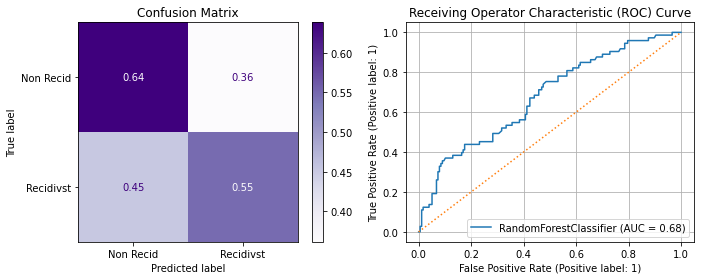

In [79]:
clf = grid.best_estimator_

evaluate_classification(clf, X_test_tf,y_test)

In [80]:
# %conda list shap

# !pip install -U shap

# %conda uninstall shap

In [81]:
import shap
shap.initjs()

ModuleNotFoundError: No module named 'shap'

In [ ]:
shap.__version__

In [ ]:
X_shap = shap.sample(X_test_tf)
X_shap

In [ ]:
# plt.style.use('seaborn-notebook')

In [ ]:
explainer = shap.TreeExplainer(clf)

In [ ]:
shap_vals = explainer.shap_values(X_shap)

In [ ]:
shap_ixn_vals = explainer.shap_interaction_values(X_shap)

In [ ]:

shap.summary_plot(shap_vals, X_shap,plot_type='dot')

In [ ]:
shap.force_plot(explainer.expected_value, X_shap[:1000],X_train[:1000])

In [ ]:
shap.summary_plot(shap_vals, X_train, plot_type="bar")